# Тест. Доверительные интервалы для среднего

$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} {\sqrt{\frac{DX}n}}$$

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
water = pd.read_csv('water.txt', delimiter='\t')
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


(array([ 2.,  6.,  5.,  8.,  9., 13.,  9.,  7.,  1.,  1.]),
 array([1096. , 1185.1, 1274.2, 1363.3, 1452.4, 1541.5, 1630.6, 1719.7,
        1808.8, 1897.9, 1987. ]),
 <a list of 10 Patch objects>)

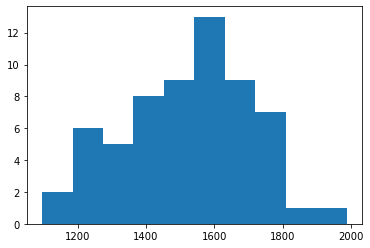

In [11]:
plt.hist(water['mortality'])

In [12]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Построим доверительные интервалы для средних вида
$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [44]:
from statsmodels.stats.weightstats import _tconfint_generic

In [46]:
mortality_mean = water['mortality'].mean()
print(mortality_mean)

1524.1475409836066


In [47]:
mortality_mean_std = water['mortality'].std(ddof=1)/np.sqrt(len(water['mortality']))
print(mortality_mean_std)

24.028521714278174


In [56]:
mortality_interval = _tconfint_generic(mortality_mean,
                                       mortality_mean_std,
                                       len(water['mortality'])-1,
                                       0.05,
                                       'two-sided')

In [61]:
print("Mortality 95%% interval", mortality_interval)

Mortality 95%% interval (1476.0833413552848, 1572.2117406119285)


In [62]:
print(round(mortality_interval[0], 4))

1476.0833


На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [63]:
south_water = water[water['location'] == 'South']

In [64]:
south_mortality_mean = south_water['mortality'].mean()
south_mortality_mean_std = south_water['mortality'].std(ddof=1)/np.sqrt(len(south_water['mortality']))

In [65]:
south_mortality_interval = _tconfint_generic(south_mortality_mean,
                                             south_mortality_mean_std,
                                             len(south_water['mortality'])-1,
                                             0.05,
                                             'two-sided')

In [66]:
print("Source mortality 95%% interval", south_mortality_interval)

Source mortality 95%% interval (1320.1517462936238, 1433.463638321761)


In [67]:
print(round(south_mortality_interval[1], 4))

1433.4636


На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [68]:
north_water = water[water['location'] == 'North']
north_mortality_mean = north_water['mortality'].mean()
north_mortality_mean_std = north_water['mortality'].std(ddof=1)/np.sqrt(len(north_water['mortality']))
north_mortality_interval = _tconfint_generic(north_mortality_mean,
                                             north_mortality_mean_std,
                                             len(north_water['mortality'])-1,
                                             0.05,
                                             'two-sided')

In [69]:
print("North mortality 95%% interval", north_mortality_interval)

North mortality 95%% interval (1586.5605251961385, 1680.6394748038613)


Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [70]:
north_water = water[water['location'] == 'North']
north_hardness_mean = north_water['hardness'].mean()
north_hardness_mean_std = north_water['hardness'].std(ddof=1)/np.sqrt(len(north_water['hardness']))
north_hardness_interval = _tconfint_generic(north_hardness_mean,
                                             north_hardness_mean_std,
                                             len(north_water['hardness'])-1,
                                             0.05,
                                             'two-sided')

In [71]:
south_water = water[water['location'] == 'South']
south_hardness_mean = south_water['hardness'].mean()
south_hardness_mean_std = south_water['hardness'].std(ddof=1)/np.sqrt(len(south_water['hardness']))
south_hardness_interval = _tconfint_generic(south_hardness_mean,
                                             south_hardness_mean_std,
                                             len(south_water['hardness'])-1,
                                             0.05,
                                             'two-sided')

In [72]:
print("North hardness 95%% interval", north_hardness_interval)
print("South hardness 95%% interval", south_hardness_interval)

North hardness 95%% interval (21.42248728572426, 39.37751271427574)
South hardness 95%% interval (53.467198692036106, 86.07126284642544)


Не пересекаются

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией $\sigma^2$:

$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

При $\sigma = 1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью ±0.1?

In [82]:
from scipy import stats
np.ceil((stats.norm.ppf(1-0.05/2)*1 / 0.1)**2)

385.0

Объём выборки, необходимый для построения доверительного интервала заданной ширины:


увеличивается с ростом дисперсии выборки


уменьшается с ростом \alphaα


увеличивается с уменьшением требуемой ширины

